
# Active Learning: Q1 (b): iv



In [0]:
'''
Q1(b)iv:
Incorporate the additional labelled points (separately, the best from i & ii) into
your model and compare with corresponding models trained with randomly
chosen labelled points. Also, compare with stream-based scenario. 
'''

'\nQ1(b)iv:\nIncorporate the additional labelled points (separately, the best from i & ii) into\nyour model and compare with corresponding models trained with randomly\nchosen labelled points. Also, compare with stream-based scenario. \n'



---


In  this section we shall make a comparison between different sampling techniques:


*   Uncertainity Sampling (Least Confidence, Margin & Entropy)
*   QBC Sampling (Vote Entropy, KL Divergence)


---


Moreover, we shall also make a comparison between the accuracies achieved by our model when it is trained through:


*   Active Learning
*   Random Selection


---


Finally, we shall also visualize the performce of Stream-based scenario with Poop-based one.


---






In [1]:
import numpy as np 
import pandas as pd 
import math
from statistics import mean 
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from scipy.stats import entropy
from time import time
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import metrics

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# split dataset into test set, train set and unlabel pool 

def split(dataset, train_size, test_size): 
	x = dataset[:, :-1] 
	y = dataset[:, -1] 
	x_train, x_pool, y_train, y_pool = train_test_split( 
		x, y, train_size = train_size) 
	unlabel, x_test, label, y_test = train_test_split( 
		x_pool, y_pool, test_size = test_size) 
	return x_train, y_train, x_test, y_test, unlabel, label

In [0]:
# Loading dataset
X_digits, y_digits = datasets.load_digits(return_X_y=True)
stack = np.vstack((X_digits.T, y_digits.T))
dataset = stack.T

# feature scalling 
sc = StandardScaler() 
dataset[:, :-1] = sc.fit_transform(dataset[:, :-1]) 


In [0]:
# function defining all types of uncertainity sampling techniques (least confidence, margin, entropy)

def uncertainity_sampling(name, unlabel, classifier, percent_of_samples, dataset):

    # For LEAST CONFIDENCE SAMPLING
    if name == 'least_confidence':
        proba = classifier.predict_proba(unlabel)
        prob_max = proba.max(axis=1)
        sorted_idx = np.argsort(prob_max)
        #print('Probability distribution of Top 5 Selection through LEAST CONFIDENCE: \n')
        #for i in range(1,6):
            #print("Selection #" + str(i) + ': ' + str(proba[sorted_idx[i-1]]) + '\n')
        
        uncrt_pt_ind = [] 
        for i in range(math.floor(percent_of_samples * 0.01 * dataset.shape[0])):
             uncrt_pt_ind.append(sorted_idx[i])
        return uncrt_pt_ind

    # For MARGIN SAMPLING
    if name == 'margin_sampling':
        proba = classifier.predict_proba(unlabel)
        part = np.partition(-proba, 1, axis=1)
        margin = - part[:, 0] + part[:, 1]
        sorted_idx = np.argsort(margin)
        # print('Probability distribution of Top 5 Selection through MARGIN SAMPLING: \n')
        # for i in range(1,6):
        #     print("Selection #" + str(i) + ': ' + str(proba[sorted_idx[i-1]]) + '\n')
        uncrt_pt_ind = [] 
        for i in range(math.floor(percent_of_samples * 0.01 * dataset.shape[0])):
             uncrt_pt_ind.append(sorted_idx[i])
        return uncrt_pt_ind

    # For ENTROPY SAMPLING
    if name == 'entropy':
        proba = classifier.predict_proba(unlabel)
        
        entr = entropy(proba.T)
        sorted_idx = np.argsort(entr)
        # print('Probability distribution of Top 5 Selection through ENTROPY: \n')
        # for i in range(1,6):
        #     print("Selection #" + str(i) + ': ' + str(proba[sorted_idx[len(entr) - i]]) + '\n')
        uncrt_pt_ind = [] 
        for i in range(math.floor(percent_of_samples * 0.01 * dataset.shape[0])):
             uncrt_pt_ind.append(sorted_idx[-i -1])
        return uncrt_pt_ind

In [0]:
# Function defining both the QBC sampling approaches

def qbc_sampling(name, unlabel, percent_of_samples, dataset, x_train, y_train):

    # We are using BAGGING TECHNIQUE for forming our Committee

    #################################################################################
    clf1 = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)    
    clf1.fit(x_train, y_train)
    clf1_pred = clf1.predict(unlabel)

    clf2 = BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=0)    
    clf2.fit(x_train, y_train)
    clf2_pred = clf2.predict(unlabel)

    clf3 = BaggingClassifier(base_estimator=SVC(), n_estimators=30, random_state=0)    
    clf3.fit(x_train, y_train)
    clf3_pred = clf3.predict(unlabel)

    clf4 = BaggingClassifier(base_estimator=SVC(), n_estimators=40, random_state=0)    
    clf4.fit(x_train, y_train)
    clf4_pred = clf4.predict(unlabel)

    clf5 = BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=0)    
    clf5.fit(x_train, y_train)
    clf5_pred = clf5.predict(unlabel)

    # #Classifier 1: Logistic Regression
    # clf1 = LogisticRegression() 
    # x_train, y_train, x_test, y_test, unlabel, label = split( dataset, 0.10, 0.20)
    # clf1.fit(x_train, y_train)
    # clf1_pred = clf1.predict(unlabel)

    # #Classifier 2: RandomForestClassifier
    # clf2 = RandomForestClassifier(n_estimators=10) 
    # x_train, y_train, x_test, y_test, unlabel, label = split( dataset, 0.10, 0.20)
    # clf2.fit(x_train, y_train)
    # clf2_pred = clf2.predict(unlabel)

    # #Classifier 3: AdaBoostClassifier
    # clf3 = AdaBoostClassifier(n_estimators=100) 
    # x_train, y_train, x_test, y_test, unlabel, label = split( dataset, 0.10, 0.20)
    # clf3.fit(x_train, y_train)
    # clf3_pred = clf3.predict(unlabel)

    # #Classifier 4: BaggingClassifier
    # clf4 = BaggingClassifier(base_estimator=SVC(), n_estimators=20, random_state=0)    
    # x_train, y_train, x_test, y_test, unlabel, label = split( dataset, 0.10, 0.20)
    # clf4.fit(x_train, y_train)
    # clf4_pred = clf4.predict(unlabel)

    # #Classifier 5: GradientBoostingClassifier
    # clf5 = GradientBoostingClassifier(random_state=0)
    # x_train, y_train, x_test, y_test, unlabel, label = split( dataset, 0.10, 0.20)
    # clf5.fit(x_train, y_train)
    # clf5_pred = clf5.predict(unlabel)



    #################################################################################

    if name == 'vote_entropy':
        
        votes = []
        votes_prob = []
        for i in range(clf4_pred.shape[0]):
            temp = []
            temp.append(clf1_pred[i])
            temp.append(clf2_pred[i])
            temp.append(clf3_pred[i])
            temp.append(clf4_pred[i])
            temp.append(clf5_pred[i])

            votes.append(temp)

            temp_p = []
            for m in range(10):
                temp_p.append(votes[i].count(m) / len(votes[i]))

            votes_prob.append(temp_p)

        votes = []
        votes_prob = []
        for i in range(clf4_pred.shape[0]):
            temp = []
            temp.append(clf1_pred[i])
            temp.append(clf2_pred[i])
            temp.append(clf3_pred[i])
            temp.append(clf4_pred[i])
            temp.append(clf5_pred[i])

            votes.append(temp)

            temp_p = []
            for m in range(10):
                temp_p.append(votes[i].count(m) / len(votes[i]))

            votes_prob.append(temp_p)

        from scipy.stats import entropy
        entr = entropy(np.array(votes_prob).T)
        sorted_idx = np.argsort(entr)
        #print('Probability distribution of Top 5 Selection through ENTROPY: \n')
        #for i in range(1,6):
            #print("Selection #" + str(i) + ': ' + str(votes[sorted_idx[len(entr) - i]]) + '\n')
        uncrt_pt_ind = [] 
        for i in range(math.floor(percent_of_samples * 0.01 * dataset.shape[0])):
                uncrt_pt_ind.append(sorted_idx[-i-1])

        return uncrt_pt_ind

    if name == 'kl_divergence':
        proba_votes = []
        proba_votes.append(clf1.predict_proba(unlabel))
        proba_votes.append(clf2.predict_proba(unlabel))
        proba_votes.append(clf3.predict_proba(unlabel))
        proba_votes.append(clf4.predict_proba(unlabel))
        proba_votes.append(clf5.predict_proba(unlabel))

        consensus_proba = (proba_votes[0] + proba_votes[1] + proba_votes[2] + proba_votes[3] + proba_votes[4]) / len(proba_votes)

        from scipy.stats import entropy
        learner_KL_div = []
        for i in range(proba_votes[1].shape[0]):
            temp = []
            
            for j in range(len(proba_votes)):
                temp.append(entropy(proba_votes[j][i], qk= consensus_proba[i]))

            learner_KL_div.append(temp)

        kl_max = np.array(learner_KL_div).max(axis=1)
        #print('Size of kl_max= '+str(kl_max.shape))
        #print('Size of unlabel= ' + str(unlabel.shape))
        sorted_idx = np.argsort(kl_max)
        #print('Probability distribution of Top 5 Selection through LEAST CONFIDENCE: \n')
        #for i in range(1,6):
            #print("Selection #" + str(i) + ': ' + str(proba[sorted_idx[i-1]]) + '\n')

        uncrt_pt_ind = [] 
        for i in range(math.floor(percent_of_samples * 0.01 * dataset.shape[0])):
            uncrt_pt_ind.append(sorted_idx[-i-1])

        return uncrt_pt_ind




Comparison between different Sampling techniques:


*   Uncertainity Sampling (Least Confidence, Margin & Entropy)
*   QBC Sampling (Vote Entropy, KL Divergence)

Comparison of the two QBC Sampling Techniques after each iteration of 10% Sampling: 

       Sampling_Name  Percent_Labelled_Samples  Accuracy
0       vote_entropy                        10  0.888889
1       vote_entropy                        20  0.966049
2       vote_entropy                        30  0.969136
3       vote_entropy                        40  0.975309
4       vote_entropy                        50  0.975309
5      kl_divergence                        10  0.888889
6      kl_divergence                        20  0.962963
7      kl_divergence                        30  0.962963
8      kl_divergence                        40  0.972222
9      kl_divergence                        50  0.972222
10  least_confidence                        10  0.888889
11  least_confidence                        20  0.966049
12  least_confidence                        30  0.959877
13  least_confidence                        40  0.972222
14  least_confidence                        50  0.978395
15

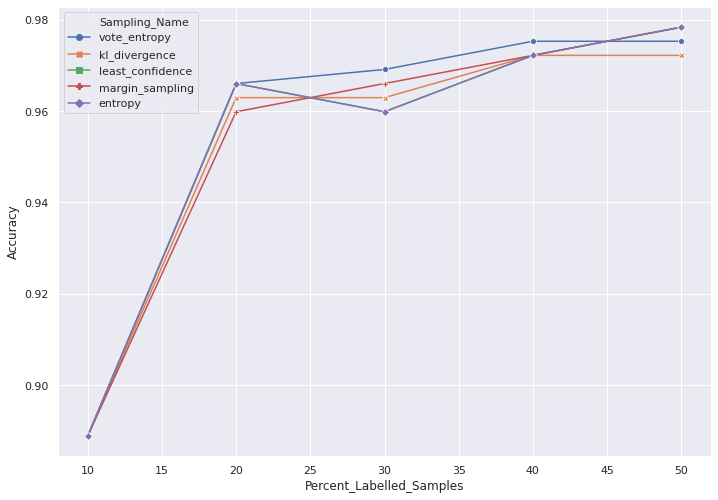

In [23]:
# COMPARISON VISUALIZATION

# QBC SAMPLING DATA

acc = []
name = []
labelled_samples_percent = []
percent_of_samples = 10
train_size = 0.10
test_size = 0.20

X_train, Y_train, X_test, Y_test, Unlabel, Label = split(dataset, train_size, test_size)

for sampling_name in ['vote_entropy', 'kl_divergence']:

    for i in range(1): 

        # Assigning x_train, x_test, y_train, y_test, unabel & label 
        x_train, y_train, x_test, y_test, unlabel, label =  X_train, Y_train, X_test, Y_test, Unlabel, Label 

        # train model by active learning by labelling the extra 10% data points with each loop (4 loops = 40% data)
        for i in range(4): 
            classifier1 = SVC(decision_function_shape='ovo', probability = True)
            classifier1.fit(x_train, y_train) 
            
            ###############################################################################
            acc.append(classifier1.score(x_test, y_test)) 
            labelled_samples_percent.append((i+1)*10)
            name.append(sampling_name)
            ###############################################################################

            y_probab = classifier1.predict_proba(unlabel)[:, 0] 

            # Obtaining the required unlabelled data points for labelling by Oracle
            uncrt_pt_ind = qbc_sampling(sampling_name, unlabel, percent_of_samples, dataset, x_train, y_train)
            
            # Appending the newly labelled data points into the training set
            x_train = np.append(unlabel[uncrt_pt_ind, :], x_train, axis = 0) 
            y_train = np.append(label[uncrt_pt_ind], y_train)

            # Deleting the newly labelled data points from the unlabelled pool
            unlabel = np.delete(unlabel, uncrt_pt_ind, axis = 0) 
            label = np.delete(label, uncrt_pt_ind) 

            # Running final classification model for the new training data set
            classifier2 = SVC(decision_function_shape='ovo', probability = True)
            classifier2.fit(x_train, y_train) 

        ###############################################################################
        acc.append(classifier2.score(x_test, y_test)) 
        labelled_samples_percent.append((i+2)*10)
        name.append(sampling_name)
        ###############################################################################

            
# UNCERTAINITY SAMPLING DATA

for sampling_name in ['least_confidence', 'margin_sampling', 'entropy']:

    for i in range(1): 

        # Assigning x_train, x_test, y_train, y_test, unabel & label 
        x_train, y_train, x_test, y_test, unlabel, label =  X_train, Y_train, X_test, Y_test, Unlabel, Label

        # train model by active learning by labelling the extra 10% data points with each loop (4 loops = 40% data)
        for i in range(4): 
            classifier1 = SVC(decision_function_shape='ovo', probability = True)
            classifier1.fit(x_train, y_train) 
            
            ###############################################################################
            acc.append(classifier1.score(x_test, y_test)) 
            labelled_samples_percent.append((i+1)*10)
            name.append(sampling_name)
            ###############################################################################

            y_probab = classifier1.predict_proba(unlabel)[:, 0] 

            # Obtaining the required unlabelled data points for labelling by Oracle
            uncrt_pt_ind = uncertainity_sampling(sampling_name, unlabel, classifier1, percent_of_samples, dataset)
            
            # Appending the newly labelled data points into the training set
            x_train = np.append(unlabel[uncrt_pt_ind, :], x_train, axis = 0) 
            y_train = np.append(label[uncrt_pt_ind], y_train)

            # Deleting the newly labelled data points from the unlabelled pool
            unlabel = np.delete(unlabel, uncrt_pt_ind, axis = 0) 
            label = np.delete(label, uncrt_pt_ind) 

            #Running final classification model for the new training data set
            classifier2 = SVC(decision_function_shape='ovo', probability = True)
            classifier2.fit(x_train, y_train) 

        ###############################################################################
        acc.append(classifier2.score(x_test, y_test)) 
        labelled_samples_percent.append((i+2)*10)
        name.append(sampling_name)
        ###############################################################################


# Creating a DataFrame for data visualization:
data_viz = pd.DataFrame({
    'Sampling_Name': name,
    'Percent_Labelled_Samples': labelled_samples_percent,
    'Accuracy': acc
})

print('Comparison of the two QBC Sampling Techniques after each iteration of 10% Sampling: \n')
print(data_viz)
print()

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.lineplot(x="Percent_Labelled_Samples", y="Accuracy",
                  hue="Sampling_Name", style="Sampling_Name",
                  markers=True, dashes=False, data=data_viz)

In [18]:
print('Comparison of the two Sampling Techniques after each iteration of 10% Sampling: \n')

data_viz

Comparison of the two Sampling Techniques after each iteration of 10% Sampling: 



,Sampling_Name,Percent_Labelled_Samples,Accuracy
0,vote_entropy,10,0.922840
1,vote_entropy,20,0.950617
2,vote_entropy,30,0.962963
3,vote_entropy,40,0.975309
4,vote_entropy,50,0.972222
5,kl_divergence,10,0.922840
6,kl_divergence,20,0.962963
7,kl_divergence,30,0.978395
8,kl_divergence,40,0.981481
9,kl_divergence,50,0.987654


Comparison between the accuracies achieved by our model when it is trained through:


*   Active Learning
*   Random Selection




Comparison of the two QBC Sampling Techniques after each iteration of 10% Sampling: 

      Learning_Type  Percent_Labelled_Samples  Accuracy
0   Active Learning                        10  0.932099
1  Random Selection                        10  0.944444
2   Active Learning                        20  0.975309
3  Random Selection                        20  0.954861
4   Active Learning                        30  0.993827
5  Random Selection                        30  0.952381
6   Active Learning                        40  0.993827
7  Random Selection                        40  0.963134
8   Active Learning                        50  0.993827
9  Random Selection                        50  0.977901



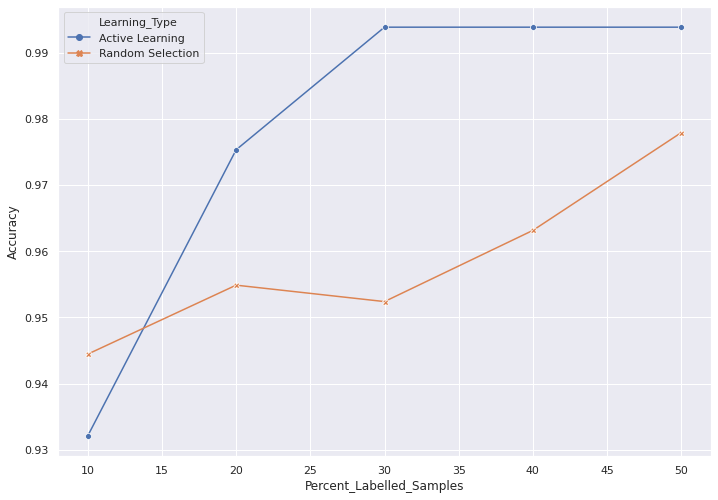

In [20]:
acc = []
name = []
labelled_samples_percent = []
percent_of_samples = 10
train_size = 0.10
test_size = 0.20

X_train, Y_train, X_test, Y_test, Unlabel, Label = split(dataset, train_size, test_size)

for i in range(1): 

    x_train, y_train, x_test, y_test, unlabel, label =  X_train, Y_train, X_test, Y_test, Unlabel, Label

    # train model by active learning by labelling the extra 10% data points with each loop (4 loops = 40% data)
    for i in range(5): 

        # ACTIVE LEARNING
        classifier1 = SVC(decision_function_shape='ovo', probability = True)
        classifier1.fit(x_train, y_train) 

        ''' split dataset into train(same as generated by our model), 
        test(20 %), unlabel(rest) for Random Selection Model'''
        r_train_size = x_train.shape[0]/dataset.shape[0] 
        xr_train, yr_train, xr_test, yr_test, r_unlabel, r_label = split( 
            dataset, r_train_size, 0.20) 
        
        ###############################################################################
        acc.append(classifier1.score(x_test, y_test)) 
        labelled_samples_percent.append((i+1)*10)
        name.append('Active Learning')
        ###############################################################################

        y_probab = classifier1.predict_proba(unlabel)[:, 0] 

        # Obtaining the required unlabelled data points for labelling by Oracle
        uncrt_pt_ind = uncertainity_sampling('entropy', unlabel, classifier1, percent_of_samples, dataset)
        
        # Appending the newly labelled data points into the training set
        x_train = np.append(unlabel[uncrt_pt_ind, :], x_train, axis = 0) 
        y_train = np.append(label[uncrt_pt_ind], y_train)

        # Deleting the newly labelled data points from the unlabelled pool
        unlabel = np.delete(unlabel, uncrt_pt_ind, axis = 0) 
        label = np.delete(label, uncrt_pt_ind) 

        # Running final classification model for the new training data set
        classifier2 = SVC(decision_function_shape='ovo', probability = True)
        classifier2.fit(x_train, y_train) 



        # RANDOM SELECTION
        # ''' split dataset into train(same as generated by our model), 
        # test(20 %), unlabel(rest) '''
        # r_train_size = x_train.shape[0]/dataset.shape[0] 
        # xr_train, yr_train, xr_test, yr_test, r_unlabel, r_label = split( 
        #     dataset, r_train_size, 0.20) 

        # train model without active learning 
        #classifier3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0) 
        classifier3 = SVC(decision_function_shape='ovo', probability = True)
        classifier3.fit(xr_train, yr_train) 

        ###############################################################################
        acc.append(classifier3.score(xr_test, yr_test)) 
        labelled_samples_percent.append((i+1)*10)
        name.append('Random Selection')
        ###############################################################################


# Creating a DataFrame for data visualization:
data_viz = pd.DataFrame({
    'Learning_Type': name,
    'Percent_Labelled_Samples': labelled_samples_percent,
    'Accuracy': acc
})

print('Comparison of the two QBC Sampling Techniques after each iteration of 10% Sampling: \n')
print(data_viz)
print()

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.lineplot(x="Percent_Labelled_Samples", y="Accuracy",
                  hue="Learning_Type", style="Learning_Type",
                  markers=True, dashes=False, data=data_viz)

# STREAM BASED SAMPLING

In [0]:
# Function for Sampling Stream based selection with ENTROPY as the sampling measure for informativeness

def stream_sampling_entropy(unlabel, classifier, percent_of_samples, dataset):

    proba = classifier.predict_proba(unlabel)
    entr = entropy(proba.T)

    n = 0
    uncrt_pt_ind = []
    for i in range(unlabel.shape[0]):
        if n < math.floor(percent_of_samples * 0.01 * dataset.shape[0]):
            if abs(entr[i]) >= 1.80:
                uncrt_pt_ind.append(i)
                n = n+1
        else:
            break
            
    return uncrt_pt_ind

In [10]:
#############################################################################################
percent_of_samples = 10
train_size = 0.10
test_size = 0.20
X_train, Y_train, X_test, Y_test, Unlabel, Label = split(dataset, train_size, test_size)

############################################################################################



# STREAM BASED SAMPLING (with Entropy as informativeness measure)
############################################################################################
# run the model 10 times and take the average of its accuracies, precision_score & f1_score 
accuracy1 = []
prec_score1 = []
f1_score1 = []

for i in range(10): 

    # split dataset into train(10 %), test(20 %), unlabel(70 %) 
    x_train, y_train, x_test, y_test, unlabel, label = X_train, Y_train, X_test, Y_test, Unlabel, Label

    # train model by active learning by labelling the extra 10% data points
    for i in range(1): 
        classifier1 = SVC(decision_function_shape='ovo', probability = True)
        classifier1.fit(x_train, y_train) 
        y_probab = classifier1.predict_proba(unlabel)[:, 0] 

        # Obtaining the required unlabelled data points for labelling by Oracle
        uncrt_pt_ind = stream_sampling_entropy(unlabel, classifier1, percent_of_samples, dataset)
        
        # Appending the newly labelled data points into the training set
        x_train = np.append(unlabel[uncrt_pt_ind, :], x_train, axis = 0) 
        proba_chosen_samples =  classifier1.predict_proba(unlabel[uncrt_pt_ind, :])
        y_train = np.append(label[uncrt_pt_ind], y_train)

        # Deleting the newly labelled data points from the unlabelled pool
        unlabel = np.delete(unlabel, uncrt_pt_ind, axis = 0) 
        label = np.delete(label, uncrt_pt_ind) 

    # Running final classification model for the new training data set
    classifier2 = SVC(decision_function_shape='ovo', probability = True)
    classifier2.fit(x_train, y_train) 

    # Obtaining the performance of the final ACTIVE LEARNING MODEL
    accuracy1.append(classifier2.score(x_test, y_test)) 
    prec_score1.append(metrics.precision_score(classifier2.predict(x_test), y_test, average = 'macro')) 
    f1_score1.append(metrics.f1_score(classifier2.predict(x_test), y_test, average = 'macro')) 

############################################################################################

############################################################################################
# Printing the performace of the ACTIVE LEARNING MODEL
print('For STREAM BASED SAMPLING (with Entropy as the informativeness measure):')
print('[At 10% additional Sampling & labelling] \n')
print("Accuracy by ACTIVE MODEL [with STREAM BASED Entropy Sampling] :", mean(accuracy1)*100) 
print("Precision Score by ACTIVE MODEL [with STREAM BASED Entropy Sampling] :", mean(prec_score1))
print("F1 Score by ACTIVE MODEL [with STREAM BASED Entropy Sampling] :", mean(f1_score1)) 
print('\n\n')

############################################################################################



# POOL BASED SAMPLING (with Entropy as informativeness measure)
############################################################################################
# run the model 10 times and take the average of its accuracies, precision_score & f1_score 
accuracy2 = []
prec_score2 = []
f1_score2 = []

for i in range(10): 

    # split dataset into train(10 %), test(20 %), unlabel(70 %) 
    x_train, y_train, x_test, y_test, unlabel, label = X_train, Y_train, X_test, Y_test, Unlabel, Label

    # train model by active learning by labelling the extra 10% data points
    for i in range(1): 
        classifier1 = SVC(decision_function_shape='ovo', probability = True)
        classifier1.fit(x_train, y_train) 
        y_probab = classifier1.predict_proba(unlabel)[:, 0] 

        # Obtaining the required unlabelled data points for labelling by Oracle
        uncrt_pt_ind = uncertainity_sampling('entropy', unlabel, classifier1, percent_of_samples, dataset)
        
        # Appending the newly labelled data points into the training set
        x_train = np.append(unlabel[uncrt_pt_ind, :], x_train, axis = 0) 
        proba_chosen_samples =  classifier1.predict_proba(unlabel[uncrt_pt_ind, :])
        y_train = np.append(label[uncrt_pt_ind], y_train)

        # Deleting the newly labelled data points from the unlabelled pool
        unlabel = np.delete(unlabel, uncrt_pt_ind, axis = 0) 
        label = np.delete(label, uncrt_pt_ind) 

    # Running final classification model for the new training data set
    classifier2 = SVC(decision_function_shape='ovo', probability = True)
    classifier2.fit(x_train, y_train) 

    # Obtaining the performance of the final ACTIVE LEARNING MODEL
    accuracy2.append(classifier2.score(x_test, y_test)) 
    prec_score2.append(metrics.precision_score(classifier2.predict(x_test), y_test, average = 'macro')) 
    f1_score2.append(metrics.f1_score(classifier2.predict(x_test), y_test, average = 'macro'))
 

############################################################################################

############################################################################################
# Printing the performace of the ACTIVE LEARNING MODEL
print('For POOL BASED SAMPLING (with Entropy as the informativeness measure): \n')
print("Accuracy by ACTIVE MODEL [with POOL BASED Entropy Sampling] :", mean(accuracy2)*100) 
print("Precision Score by ACTIVE MODEL [with POOL BASED Entropy Sampling] :", mean(prec_score2))
print("F1 Score by ACTIVE MODEL [with POOL BASED Entropy Sampling] :", mean(f1_score2)) 

############################################################################################


For STREAM BASED SAMPLING (with Entropy as the informativeness measure):
[At 10% additional Sampling & labelling] 

Accuracy by ACTIVE MODEL [with STREAM BASED Entropy Sampling] : 97.0679012345679
Precision Score by ACTIVE MODEL [with STREAM BASED Entropy Sampling] : 0.969594024678837
F1 Score by ACTIVE MODEL [with STREAM BASED Entropy Sampling] : 0.9692385151171763



For POOL BASED SAMPLING (with Entropy as the informativeness measure): 

Accuracy by ACTIVE MODEL [with POOL BASED Entropy Sampling] : 97.43827160493828
Precision Score by ACTIVE MODEL [with POOL BASED Entropy Sampling] : 0.9743562373225152
F1 Score by ACTIVE MODEL [with POOL BASED Entropy Sampling] : 0.9733338429257438


COMPARISION BETWEEN POOL BASED & STREAM BASED SAMPLING

In [11]:
compare = pd.DataFrame({
    'Sampling': ['Pool_based', 'Stream_based'],
    'Accuracy': [float("%0.4f" % (mean(accuracy2))), float("%0.4f" % (mean(accuracy1)))],
    'F1_Score': [float("%0.4f" % (mean(f1_score2))), float("%0.4f" % (mean(f1_score1)))],
    'Precision_Score': [float("%0.4f" % (mean(prec_score2))), float("%0.4f" % (mean(prec_score1)))]
})

print('Comparison of the two Sampling Approaches after sampling additional 10% of data points: \n')
print(compare)

Comparison of the two Sampling Approaches after sampling additional 10% of data points: 

       Sampling  Accuracy  F1_Score  Precision_Score
0    Pool_based    0.9744    0.9733           0.9744
1  Stream_based    0.9707    0.9692           0.9696


Comparison of the two QBC Sampling Techniques after each iteration of 10% Sampling: 

  Sampling_Name  Percent_Labelled_Samples  Accuracy
0    pool_based                        10  0.873457
1    pool_based                        20  0.950617
2    pool_based                        30  0.972222
3    pool_based                        40  0.972222
4    pool_based                        50  0.975309
5  stream_based                        10  0.873457
6  stream_based                        20  0.944444
7  stream_based                        30  0.947531
8  stream_based                        40  0.947531
9  stream_based                        50  0.947531



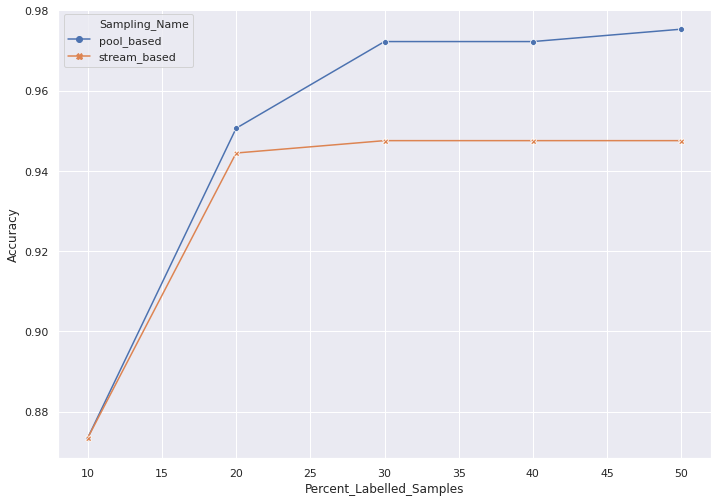

In [19]:
# COMPARISON VISUALIZATION

acc = []
name = []
labelled_samples_percent = []
percent_of_samples = 10
train_size = 0.10
test_size = 0.20

X_train, Y_train, X_test, Y_test, Unlabel, Label = split(dataset, train_size, test_size)

for sampling_name in ['pool_based', 'stream_based']:

    for i in range(1): 

        # Assigning x_train, x_test, y_train, y_test, unabel & label 
        x_train, y_train, x_test, y_test, unlabel, label =  X_train, Y_train, X_test, Y_test, Unlabel, Label 

        # train model by active learning by labelling the extra 10% data points with each loop (4 loops = 40% data)
        for i in range(4): 
            classifier1 = SVC(decision_function_shape='ovo', probability = True)
            classifier1.fit(x_train, y_train) 
            
            ###############################################################################
            acc.append(classifier1.score(x_test, y_test)) 
            labelled_samples_percent.append((i+1)*10)
            name.append(sampling_name)
            ###############################################################################

            y_probab = classifier1.predict_proba(unlabel)[:, 0] 

            # Obtaining the required unlabelled data points for labelling by Oracle
            if sampling_name == 'pool_based':
                uncrt_pt_ind = uncertainity_sampling('entropy', unlabel, classifier1, percent_of_samples, dataset)

            elif sampling_name == 'stream_based':
                uncrt_pt_ind = stream_sampling_entropy(unlabel, classifier1, percent_of_samples, dataset)
            
            # Appending the newly labelled data points into the training set
            x_train = np.append(unlabel[uncrt_pt_ind, :], x_train, axis = 0) 
            y_train = np.append(label[uncrt_pt_ind], y_train)

            # Deleting the newly labelled data points from the unlabelled pool
            unlabel = np.delete(unlabel, uncrt_pt_ind, axis = 0) 
            label = np.delete(label, uncrt_pt_ind) 

            # Running final classification model for the new training data set
            classifier2 = SVC(decision_function_shape='ovo', probability = True)
            classifier2.fit(x_train, y_train) 

        ###############################################################################
        acc.append(classifier2.score(x_test, y_test)) 
        labelled_samples_percent.append((i+2)*10)
        name.append(sampling_name)
        ###############################################################################

            
# Creating a DataFrame for data visualization:
data_viz = pd.DataFrame({
    'Sampling_Name': name,
    'Percent_Labelled_Samples': labelled_samples_percent,
    'Accuracy': acc
})

print('Comparison of the two QBC Sampling Techniques after each iteration of 10% Sampling: \n')
print(data_viz)
print()

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.lineplot(x="Percent_Labelled_Samples", y="Accuracy",
                  hue="Sampling_Name", style="Sampling_Name",
                  markers=True, dashes=False, data=data_viz)

In [13]:
print('Comparison of the two Sampling Techniques after each iteration of 10% Sampling: \n')

data_viz

Comparison of the two Sampling Techniques after each iteration of 10% Sampling: 



,Sampling_Name,Percent_Labelled_Samples,Accuracy
0,pool_based,10,0.898148
1,pool_based,20,0.929012
2,pool_based,30,0.969136
3,pool_based,40,0.975309
4,stream_based,10,0.898148
5,stream_based,20,0.941358
6,stream_based,30,0.938272
7,stream_based,40,0.938272


END OF Q1(b) iv